# 1. 기본설정
- 코랩 드라이브 연결
- warning 금지
- max_columns 출력
- 한글 표현화를 위한 처리

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 맷플롯립을 가져온다.
import matplotlib as mpl

# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt

# 넘파이를 가져온다. 
import numpy as np

# 맷플롯립에서 폰트매니저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm
# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null
# [필요하다면] 설치된 폰트 파일의 파일 이름 확인
# fm._rebuild()
# sorted([f.name 
#        for f in fm.fontManager.ttflist 
#        if f.name.startswith("Nanum")])
# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
plt.rc('font', family='NanumSquareRound') 

fm._rebuild()

# 2. 청소년 데이터 youth_df.csv 재가공 하기
 - 기본적으로 전처리된 청소년 자료.
 - 결측치가 많은 columns과 기타 결측치를 포함한 data 삭제
 - 2018.1.1.~2022.5.까지 자료

## 2.1. 청소년 데이터 불러오기

In [4]:
# 청소년 체력 데이터 불러오기
%cd '/content/gdrive/MyDrive/class7/00_sbs/핵심역량프로젝트/지성'
youth_df = pd.read_csv('youth_df.csv')

/content/gdrive/MyDrive/class7/00_sbs/핵심역량프로젝트/지성


In [5]:
youth_df
youth_df.drop(columns=['Unnamed: 0'], inplace=True)
youth_df

,측정회차,센터명,나이구분,측정구분,연령(만),입력구분,상장구분,측정일,성별,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,맥압
0,1,노원,청소년,일반,17.0,관리자,참가증,20180102,M,173.5,88.30,31.1,74.0,130.0,26.0,2.0,21.26,0.390,72.285,29.3,20.0,45.4,56.0
1,2,세종,청소년,일반,13.0,인바디,참가증,20180102,F,153.5,44.12,17.6,73.0,120.0,38.0,21.4,19.30,0.477,62.698,18.7,15.0,45.7,47.0
2,1,노원,청소년,일반,15.0,관리자,3등급,20180102,M,179.6,64.50,14.7,53.0,106.0,47.0,6.0,19.22,0.514,52.381,20.0,40.0,50.5,53.0
3,1,순천,청소년,일반,16.0,인바디,참가증,20180102,M,160.9,56.22,13.8,78.0,123.0,64.0,19.1,19.60,0.638,43.414,21.7,35.0,76.8,45.0
4,1,순천,청소년,일반,17.0,인바디,3등급,20180102,F,161.0,46.04,22.3,80.0,120.0,21.0,12.5,26.00,0.415,49.322,17.8,26.0,58.8,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182105,1,KSPO아산(출장),청소년,출장,16.0,관리자,2등급,20220530,F,165.4,56.20,24.6,67.0,133.0,44.0,18.1,22.78,0.511,48.305,20.5,26.0,50.2,66.0
182106,1,KSPO아산(출장),청소년,출장,16.0,관리자,참가증,20220530,F,158.7,48.20,32.3,76.0,124.0,19.0,3.8,28.50,0.424,54.434,19.1,13.0,48.1,48.0
182107,1,광주,청소년,출장,18.0,관리자,2등급,20220530,M,174.0,72.40,20.1,71.0,120.0,48.0,22.0,18.31,0.557,58.765,23.9,63.0,68.5,49.0
182108,1,KSPO아산(출장),청소년,출장,16.0,관리자,1등급,20220530,F,161.7,47.90,20.9,52.0,93.0,42.0,26.9,20.93,0.503,65.724,18.3,51.0,56.8,41.0


# 3. ML 모델만들기

## 3.1. 선형회귀 모델 만들기
 - 3.1.1. 기본 선형회귀 모델 만들기
 - 3.1.2. 라쏘 회귀 모델 만들기

### 3.1.1. 기본 선형회귀 모델 만들기
1. 기본데이터
        need_col = ['연령(만)', '성별', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)
       '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

2. 요약
        - ML으로 체지방율 예측
        - 체지방율, BMI를 이용한 비만 등급 계산

In [6]:
need_col = ['측정일', '연령(만)', '성별',
       '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

input_X = youth_df[need_col]
input_y = youth_df[['측정일', '체지방율']] # body fat; 체지방률

train_X = input_X[input_X['측정일'] <= 20191231]
train_y = input_y[input_y['측정일'] <= 20191231]
train_X['성별'] = train_X['성별'].replace({'M':0, 'F':1})
train_X.drop(columns=['측정일'], inplace=True)
train_y.drop(columns=['측정일'], inplace=True)
train_X.tail()

test_X = input_X[input_X['측정일'] > 20220101]
test_y = input_y[input_y['측정일'] > 20220101]
test_X['성별'] = test_X['성별'].replace({'M':0, 'F':1})
test_X.drop(columns=['측정일'], inplace=True)
test_y.drop(columns=['측정일'], inplace=True)
test_X.head()

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
160588,18.0,0,56.0,15.7,18.05,0.551,53.799,21.6,47.0,64.1
160589,18.0,0,56.0,22.7,16.96,0.648,51.312,19.3,41.0,60.9
160590,17.0,0,61.0,22.1,17.15,0.614,45.410,23.0,30.0,76.3
160591,18.0,0,50.0,14.2,19.25,0.563,44.880,25.8,37.0,58.3
160592,18.0,0,53.0,20.5,19.69,0.601,41.792,19.8,80.0,67.8


In [7]:
print(len(train_X))
print(test_X.shape)

139894
(21522, 10)


In [8]:
# 데이터 polynomailfeatures & scaling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(train_X)
dummy_train_X = pd.DataFrame(pf.fit_transform(train_X), columns=pf.get_feature_names_out(input_features=train_X.columns))
dummy_test_X = pd.DataFrame(pf.fit_transform(test_X), columns=pf.get_feature_names_out(input_features=test_X.columns))

ss = StandardScaler()
# Polynomical 한것.
# scaled_train_X = pd.DataFrame(ss.fit_transform(dummy_train_X), columns=dummy_train_X.columns)
# scaled_train_X.head()
# scaled_test_X = pd.DataFrame(ss.transform(dummy_test_X), columns=dummy_test_X.columns)
# scaled_test_X.head()

#polynomial 안한 것.
scaled_train_X = pd.DataFrame(ss.fit_transform(train_X), columns=train_X.columns)
scaled_train_X.head()
scaled_test_X = pd.DataFrame(ss.transform(test_X), columns=test_X.columns)
scaled_test_X.head()

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
0,1.721585,-0.918251,1.189452,0.600166,-1.091037,0.737320,0.047677,-0.178790,0.567444,1.065303
1,1.721585,-0.918251,1.189452,1.292446,-1.441675,1.848931,-0.247238,-0.727503,0.259184,0.803638
2,1.103174,-0.918251,1.559679,1.233107,-1.380555,1.459295,-0.947114,0.155209,-0.305957,2.062901
3,1.721585,-0.918251,0.745180,0.451820,-0.705014,0.874839,-1.009962,0.823207,0.053678,0.591035
4,1.721585,-0.918251,0.967316,1.074872,-0.563472,1.310316,-1.376146,-0.608217,2.262869,1.367853


In [9]:
# new_df = pd.concat([scaled_train_X.min(axis=0), scaled_train_X.mean(axis=0), scaled_train_X.max(axis=0)], axis=1)
# new_df.rename(columns={0:'min', 1:'mean', 2:'max'})

In [10]:
# train, val 데이터 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(scaled_train_X, train_y, test_size= 0.2, random_state=40)
print(train_input.shape)
print(train_target.shape)
print(val_input.shape)
print(val_target.shape)

(111915, 10)
(111915, 1)
(27979, 10)
(27979, 1)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lr = LinearRegression()
lr.fit(train_input, train_target)

pred_train_y = lr.predict(train_input)
pred_val_y = lr.predict(val_input)
pred_test_y = lr.predict(scaled_test_X)


train_MAE = mean_absolute_error(train_target, pred_train_y)
train_MSE = mean_squared_error(train_target, pred_train_y)
train_RMSE = np.sqrt(mean_squared_error(train_target, pred_train_y))
train_R2 = r2_score(train_target, pred_train_y)

val_MAE = mean_absolute_error(val_target, pred_val_y)
val_MSE = mean_squared_error(val_target, pred_val_y)
val_RMSE = np.sqrt(mean_squared_error(val_target, pred_val_y))
val_R2 = r2_score(val_target, pred_val_y)

test_MAE = mean_absolute_error(test_y, pred_test_y)
test_MSE = mean_squared_error(test_y, pred_test_y)
test_RMSE = np.sqrt(mean_squared_error(test_y, pred_test_y))
test_R2 = r2_score(test_y, pred_test_y)

# 검증
pd.DataFrame([[train_MAE, train_MSE, train_RMSE, train_R2],
              [val_MAE, val_MSE, val_RMSE, val_R2],
              [test_MAE, test_MSE, test_RMSE, test_R2]], 
             index=['Train', 'Validation', 'Test'], columns=['MAE', 'MSE', 'RMSE', 'R2'])

,MAE,MSE,RMSE,R2
Train,2.984079,15.188824,3.897284,0.826565
Validation,2.977089,15.026501,3.876403,0.828781
Test,2.889811,13.566839,3.683319,0.849563


In [12]:
# print(type(pred_test_y.shape))
# print(type(test_y.shape))
# print(pred_test_y.shape)
# print(test_y.shape)
# print(type(test_X.to_numpy))
test = np.hstack((test_y, pred_test_y)) # 이게 차원수가 맞아야 결합을 시켜주네~
test_df = pd.DataFrame(test, columns=['체지방율(측정)', '체지방율(예측)'], index=(test_X.index.values.astype(int)))
print(test.shape)

(21522, 2)


In [13]:
result_df = pd.merge(test_X, test_df, how='left', on=test_X.index)
result_df.index = result_df['key_0']
result_df.index.name = ''
result_df.drop(columns=['key_0'], inplace=True)
result_df

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,체지방율(측정),체지방율(예측)
,,,,,,,,,,,,
160588,18.0,0,56.0,15.7,18.05,0.551,53.799,21.6,47.0,64.1,16.2,17.535915
160589,18.0,0,56.0,22.7,16.96,0.648,51.312,19.3,41.0,60.9,9.5,14.318044
160590,17.0,0,61.0,22.1,17.15,0.614,45.410,23.0,30.0,76.3,11.2,17.366811
160591,18.0,0,50.0,14.2,19.25,0.563,44.880,25.8,37.0,58.3,26.1,24.148964
160592,18.0,0,53.0,20.5,19.69,0.601,41.792,19.8,80.0,67.8,12.7,12.970763
...,...,...,...,...,...,...,...,...,...,...,...,...
182105,16.0,1,44.0,18.1,22.78,0.511,48.305,20.5,26.0,50.2,24.6,27.322219
182106,16.0,1,19.0,3.8,28.50,0.424,54.434,19.1,13.0,48.1,32.3,28.822122
182107,18.0,0,48.0,22.0,18.31,0.557,58.765,23.9,63.0,68.5,20.1,18.786557


In [14]:
# bmi 등급 나누기

def bmi_grade(bmi):
    if bmi <= 18.5:
        return 0 # 저체중
    elif 18.5 < bmi <= 23.:
        return 1 # 정상
    elif 23. < bmi <= 25.:
        return 2 # 과체중
    elif 25. < bmi <= 35:
        return 3 # 비만
    else :
        return 4 # 고도비만
    # else:
    #     return 'who are you?'

def male_bodyfat_grade(bodyfat):
    if bodyfat < 10:
        return 0 # 저체중
    elif 10 <= bodyfat < 21.:
        return 1 # 정상
    elif 21 < bodyfat <= 25.:
        return 2 # 과체중
    elif 25. < bodyfat <= 35.:
        return 3 # 비만
    else :
        return 4 #고도비만
    # else:
    #     return 'who are you?'

def female_bodyfat_grade(bodyfat):
    if bodyfat < 18:
        return 0 # 저체중
    elif 18 <= bodyfat < 25.:
        return 1 # 정상
    elif 25 < bodyfat <= 30.:
        return 2 # 과체중
    elif 30. < bodyfat <= 40.:
        return 3 # 비만
    else:
        return 4 # 고도비만
    # else:
    #     return 'who are you?'


In [15]:
result_df['BMI_등급'] = result_df['BMI'].apply(bmi_grade)

In [16]:
result_df['BMI_등급'].value_counts()

1    9725
3    5017
0    3460
2    3007
4     313
Name: BMI_등급, dtype: int64

In [17]:
result_df['체지방율(예측)_등급'] = None
result_df['체지방율(측정)_등급'] = None
result_df.head()

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,체지방율(측정),체지방율(예측),BMI_등급,체지방율(예측)_등급,체지방율(측정)_등급
,,,,,,,,,,,,,,,
160588,18.0,0,56.0,15.7,18.05,0.551,53.799,21.6,47.0,64.1,16.2,17.535915,1,None,None
160589,18.0,0,56.0,22.7,16.96,0.648,51.312,19.3,41.0,60.9,9.5,14.318044,1,None,None
160590,17.0,0,61.0,22.1,17.15,0.614,45.410,23.0,30.0,76.3,11.2,17.366811,1,None,None
160591,18.0,0,50.0,14.2,19.25,0.563,44.880,25.8,37.0,58.3,26.1,24.148964,3,None,None
160592,18.0,0,53.0,20.5,19.69,0.601,41.792,19.8,80.0,67.8,12.7,12.970763,1,None,None


In [18]:
grade_df = result_df.copy()

grade_df['체지방율(예측)_등급'][grade_df['성별']==0] = grade_df['체지방율(예측)'][grade_df['성별']==0].apply(male_bodyfat_grade)
grade_df['체지방율(예측)_등급'][grade_df['성별']==1] = grade_df['체지방율(예측)'][grade_df['성별']==1].apply(female_bodyfat_grade)
grade_df['체지방율(측정)_등급'][grade_df['성별']==0] = grade_df['체지방율(측정)'][grade_df['성별']==0].apply(male_bodyfat_grade)
grade_df['체지방율(측정)_등급'][grade_df['성별']==1] = grade_df['체지방율(측정)'][grade_df['성별']==1].apply(female_bodyfat_grade)
grade_df['체지방율(측정)_등급'].isnull().sum()

0

In [19]:
grade_df.head()
grade_df['체지방율(측정)_등급'].value_counts()

3.0    7804
1.0    6567
2.0    3947
4.0    2414
0.0     790
Name: 체지방율(측정)_등급, dtype: int64

In [38]:
pred_grade_num = grade_df['체지방율(예측)_등급'].value_counts().sort_index()
meas_grade_num = grade_df['체지방율(측정)_등급'].value_counts().sort_index()
grade_num = pd.merge(meas_grade_num, pred_grade_num, how='left', on=meas_grade_num.index)
grade_num.drop(columns=grade_num.columns[0], inplace=True)

pred_grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
meas_grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
print(pred_grade_num)
print(meas_grade_num)

저체중      235
정상체중    6982
과체중     5466
비만      7171
고도비만    1668
Name: 체지방율(예측)_등급, dtype: int64
저체중      790
정상체중    6567
과체중     3947
비만      7804
고도비만    2414
Name: 체지방율(측정)_등급, dtype: int64


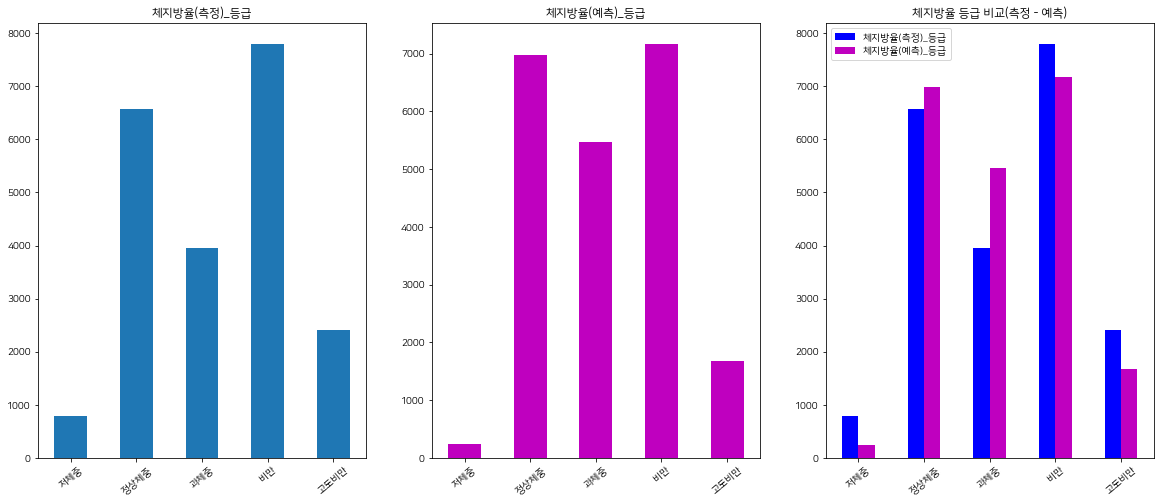

In [39]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

meas_grade_num.plot.bar(ax=ax1, title='체지방율(측정)_등급', rot=40)
pred_grade_num.plot.bar(ax=ax2, title='체지방율(예측)_등급', rot=40, color='M')
grade_num.plot.bar(ax=ax3, title='체지방율 등급 비교(측정 - 예측)', rot=40, color=['b', 'M'])
plt.savefig('체지방율_측정_예측_등급.png', bbox_inches='tight')
plt.show()

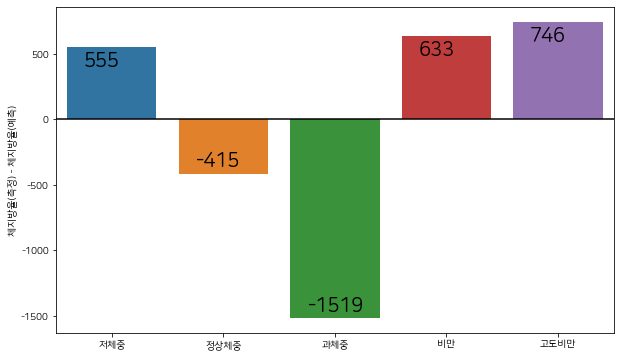

In [80]:
import seaborn as sns
import numpy as np

grade_num['체지방율(측정) - 체지방율(예측)'] = grade_num['체지방율(측정)_등급'] - grade_num['체지방율(예측)_등급']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.barplot(ax=ax, x=grade_num.index, y='체지방율(측정) - 체지방율(예측)', data=grade_num)
ax.axhline(0, color='k')
for i in range(len(grade_num)):
    x = i - 0.25
    value = grade_num['diff_예측_측정'][grade_num.index[i]]
    if  value > 0:
        y = value - 150
    else:
        y = value + 50
    ax.text(x, y, value, fontdict={'size': 20})

plt.savefig('체지방율_측정_예측_차이.png', bbox_inches='tight')
plt.show()

In [ ]:
print(diff_df)

NameError: ignored

In [ ]:
grade_df['체지방율(측정)_등급'].value_counts()

0.0     790
4.0    2414
2.0    3947
1.0    6567
3.0    7804
Name: 체지방율(측정)_등급, dtype: int64

---